<a href="https://colab.research.google.com/github/Hassan7838/cnn-image-classification/blob/main/cnn-image-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Convolutional Neural Network (CNN) Development for Image Classification on CIFAR-10 Dataset

# Getting Dataset and Preprocessing
from tensorflow.keras.datasets import cifar10
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

# Normalize Pixel Values
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

# One Hot Labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

# Shape of Dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)


In [ ]:
# CNN Architecture
from tensorflow.keras import layers, models
model = models.Sequential([
    # Input Layer
    layers.Input(shape=(32,32,3)),

    # First Con Layer
    layers.Conv2D(32, (3,3) , activation='relu'),
    layers.MaxPooling2D(2,2),

    # Second Con Layer
    layers.Conv2D(64, (3,3) , activation='relu'),
    layers.MaxPooling2D(2,2),

    # Third Con Layer
    layers.Conv2D(64, (3,3) , activation='relu'),

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Data Augmentation Rules
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
)

# Fit the generator to training data
datagen.fit(X_train)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs = 10,
    validation_data = (X_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 117ms/step - accuracy: 0.3020 - loss: 1.8705 - val_accuracy: 0.4755 - val_loss: 1.4408
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 118ms/step - accuracy: 0.4870 - loss: 1.4113 - val_accuracy: 0.5425 - val_loss: 1.2655
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5476 - loss: 1.2657 - val_accuracy: 0.6007 - val_loss: 1.1680
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.5870 - loss: 1.1647 - val_accuracy: 0.6432 - val_loss: 1.0274
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 116ms/step - accuracy: 0.6077 - loss: 1.1061 - val_accuracy: 0.6532 - val_loss: 0.9830
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.6302 - loss: 1.0503 - val_accuracy: 0.6557 - val_loss: 0.9981
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.6474 - loss: 1.0097 - val_accuracy: 0.6541 - val_loss: 1.0353
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.6545 - loss: 0.9850 - val

In [ ]:
# Evaluate final model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 4s - 12ms/step - accuracy: 0.7036 - loss: 0.8706
Test Accuracy: 0.7036
Test Loss: 0.8706


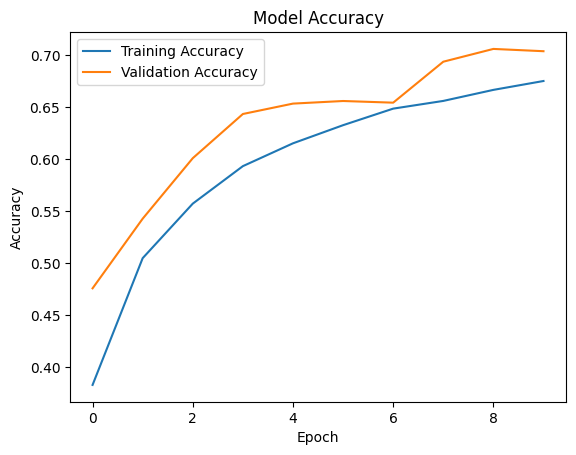

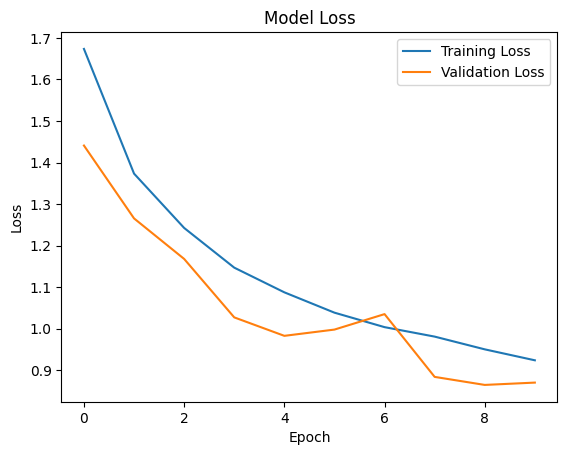

In [ ]:
# Accuracy & Loss curves
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

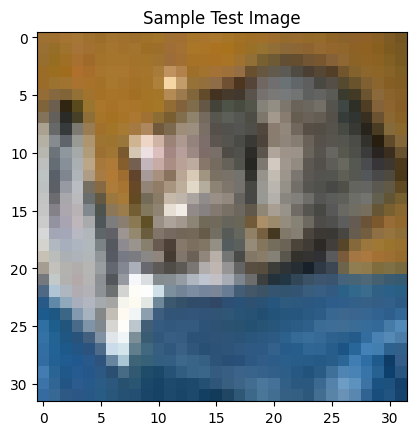

In [ ]:
# Feature Map Visualization

# Picking Sample Image
import numpy as np
import matplotlib.pyplot as plt

# Pick one image from the test set
sample_image = X_test[0]
sample_image_input = np.expand_dims(sample_image, axis=0)  # add batch dimension

plt.imshow(sample_image)
plt.title("Sample Test Image")
plt.show()

In [ ]:
from tensorflow.keras.models import Model
model.build(input_shape=(None,) + sample_image_input.shape[1:])

# Choose the layers you want to visualize (conv layers only)
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]

# Build a new model that will return these outputs
feature_map_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Get feature maps for the sample image
feature_maps = feature_map_model.predict(sample_image_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


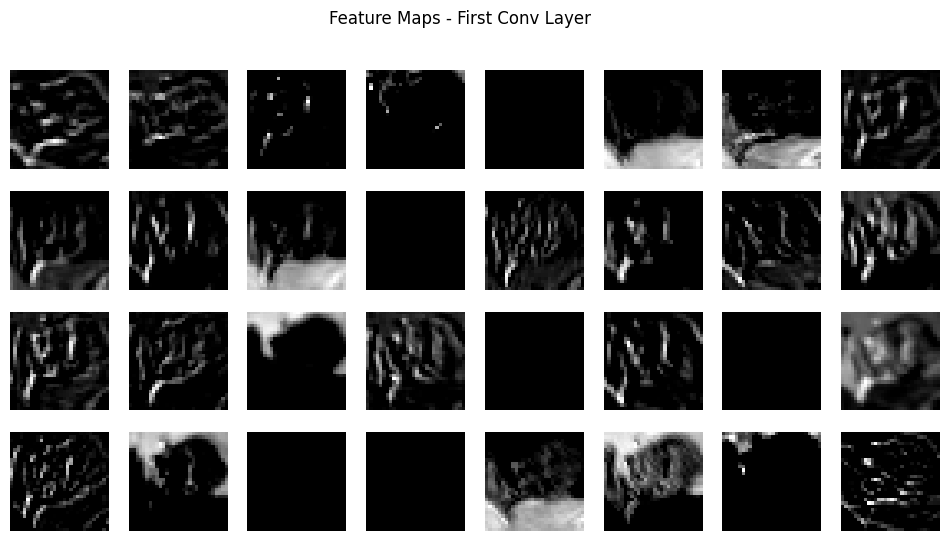

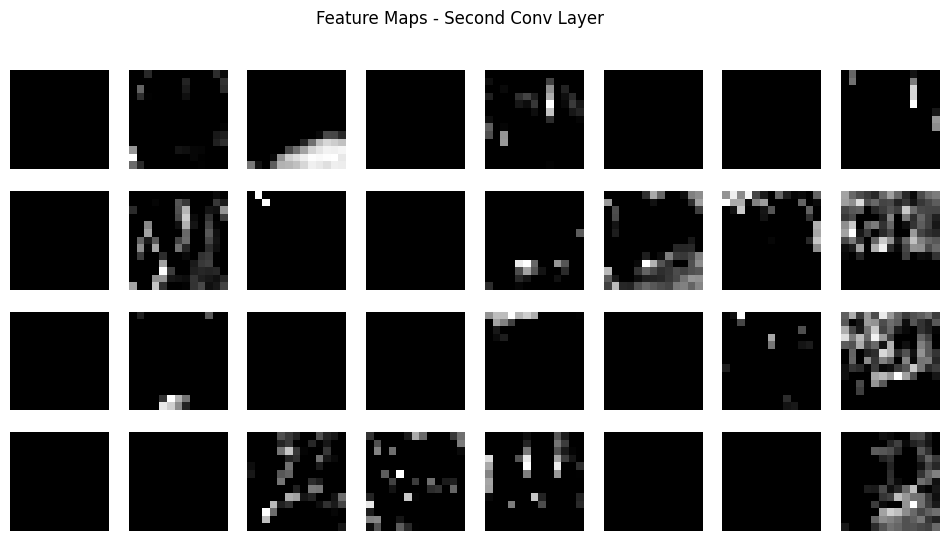

In [ ]:
# Visualize Feature Maps
# first conv layer
first_layer_features = feature_maps[0]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(first_layer_features[0, :, :, i], cmap='gray')
    ax.axis('off')
plt.suptitle("Feature Maps - First Conv Layer")
plt.show()

# second conv layer
second_layer_features = feature_maps[1]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(second_layer_features[0, :, :, i], cmap='gray')
    ax.axis('off')
plt.suptitle("Feature Maps - Second Conv Layer")
plt.show()